In [99]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import re as re                                  # regex 
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Sans'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

import pandas as pd
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

init_notebook_mode(connected=True)

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [100]:
cpu = pd.read_csv('./Datasets/cpu.csv', parse_dates=[0], index_col=0)
load = pd.read_csv('./Datasets/load.csv', parse_dates=[0], index_col=0)
mem = pd.read_csv('./Datasets/memory_usage.csv', parse_dates=[0], index_col=0)

In [101]:
cpu[cpu < 0] = None
cpu.dropna()

load[load < 0] = None
load.dropna()

mem[load < 0] = None
mem.dropna()

,Value bytes
Time,
2018-10-02 14:00:00,9395879526
2018-10-02 14:05:00,9218781184
2018-10-02 14:10:00,9192065980
2018-10-02 14:15:00,9238642142
2018-10-02 14:20:00,9646990814
2018-10-02 14:25:00,9503521860
2018-10-02 14:30:00,9316591070
2018-10-02 14:35:00,9245869534
2018-10-02 14:40:00,9186803166


In [102]:
result = cpu.join(load, how='outer').join(mem, how='outer')
result.dropna().to_csv('concatenated.csv')

In [103]:
concatenated = pd.read_csv('concatenated.csv')
concatenated

,Time,Value %,Load %,Value bytes
0,2018-10-02 14:00:00,22.618852,3.845667,9395879526
1,2018-10-02 14:05:00,22.885921,3.667667,9218781184
2,2018-10-02 14:10:00,22.668752,3.473000,9192065980
3,2018-10-02 14:15:00,21.676240,3.535333,9238642142
4,2018-10-02 14:20:00,21.774789,4.067667,9646990814
5,2018-10-02 14:25:00,21.505573,3.406333,9503521860
6,2018-10-02 14:30:00,21.900370,3.429000,9316591070
7,2018-10-02 14:35:00,22.543097,3.675667,9245869534
8,2018-10-02 14:40:00,18.929865,3.400667,9186803166
9,2018-10-02 14:45:00,13.689513,2.424333,7120663484


In [104]:
def feature_normalize(dataset):
    mu = dataset.mean()
    sigma = dataset.std()
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = dataset.mean()
    sigma = dataset.std()
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

Number of datapoints in training set: 8529
Number of dimensions/features: 3


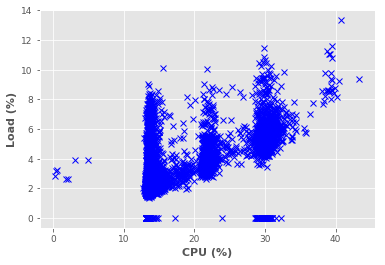

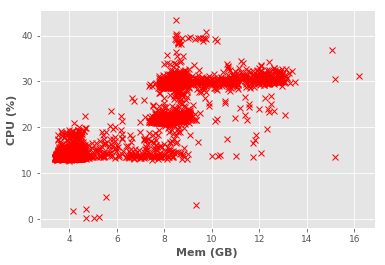

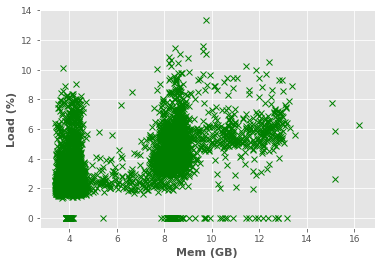

In [105]:
result = pd.read_csv('concatenated.csv', parse_dates=[0], index_col=0)

n_training_samples = result.shape[0]
n_dim = result.shape[1]

print('Number of datapoints in training set: %d' % n_training_samples)
print('Number of dimensions/features: %d' % n_dim)

cpu = result['Value %']
load = result['Load %']
mem = result['Value bytes']
mem = mem /(1024 * 1024 * 1024)
# print(result[:,:,:])

plt.xlabel('CPU (%)')
plt.ylabel('Load (%)')
plt.plot(cpu, load, 'bx')
plt.show()

plt.xlabel('Mem (GB)')
plt.ylabel('CPU (%)')
plt.plot(mem, cpu, 'rx')
plt.show()

plt.xlabel('Mem (GB)')
plt.ylabel('Load (%)')
plt.plot(mem, load, 'gx')
plt.show()

In [106]:
tr_data = result[['Value %', 'Load %']] 
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data, mu, sigma)

In [107]:
p = p[~np.isnan(p)]

0.011235299518701131 0.008355513594856066 9.9e-20


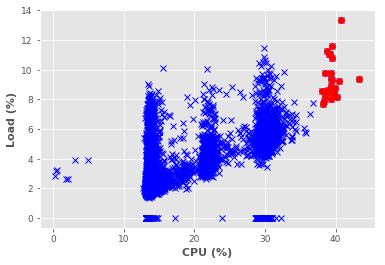

In [108]:
ep = 9.9e-20
print(p.mean(), p.std(), ep)
outliers = np.asarray(np.where(p < ep))

plt.figure()
plt.xlabel('CPU (%)')
plt.ylabel('Load (%)') 
plt.plot(cpu ,load,'bx')
plt.plot(cpu[outliers], load[outliers],'ro')
plt.show()

In [134]:
c_an = pd.DataFrame(cpu[outliers][0], index=cpu.index[outliers][0])
c_an

,0
2018-10-20 03:35:00,39.511714
2018-10-24 11:25:00,39.373786
2018-10-24 11:30:00,38.924849
2018-10-24 11:35:00,39.344218
2018-10-24 11:40:00,39.782506
2018-10-24 11:45:00,39.548305
2018-10-24 11:50:00,38.840330
2018-10-24 11:55:00,39.412585
2018-10-24 12:00:00,39.336897
2018-10-24 12:05:00,38.857566


In [110]:
result['Value bytes']=result['Value bytes']/(1024 * 1024 * 1024)
tr_data = result[['Value bytes', 'Value %']] 
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data, mu, sigma)

In [111]:
p = p[~np.isnan(p)]

0.008296872058539413 0.00603835034752446 9.9e-16


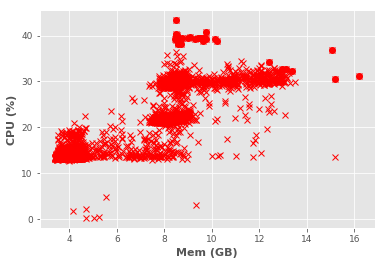

In [112]:
ep = 9.9e-16
print(p.mean(), p.std(), ep)
outliers1 = np.asarray(np.where(p < ep))

plt.figure()
plt.xlabel('Mem (GB)')
plt.ylabel('CPU (%)')
plt.plot(mem, cpu, 'rx')
plt.plot(mem[outliers1], cpu[outliers1],'ro')
plt.show()

In [136]:
c_ana = pd.DataFrame(mem[outliers1][0], index=mem.index[outliers1][0])
c_ana

,0
2018-10-20 03:35:00,9.711790
2018-10-24 11:25:00,8.729600
2018-10-24 11:30:00,8.618780
2018-10-24 11:35:00,9.289545
2018-10-24 11:40:00,9.095481
2018-10-24 11:45:00,9.424675
2018-10-24 11:50:00,9.637280
2018-10-24 11:55:00,9.522813
2018-10-24 12:00:00,10.150897
2018-10-24 12:05:00,10.222757


In [114]:
result['Value bytes']=result['Value bytes']/(1024 * 1024 * 1024)
tr_data = result[['Value bytes', 'Load %']] 
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data, mu, sigma)

In [115]:
p = p[~np.isnan(p)]

1735.2902820854968 773.4655416298009 0.00099


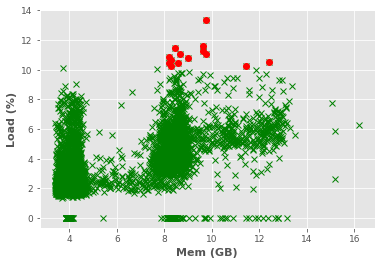

In [145]:
ep = 9.9e-4
print(p.mean(), p.std(), ep)
outliers2 = np.asarray(np.where(p < ep))

plt.figure()
plt.xlabel('Mem (GB)')
plt.ylabel('Load (%)')
plt.plot(mem, load, 'gx')
plt.plot(mem[outliers2], load[outliers2],'ro')
plt.show()

In [139]:
c_anaa = pd.DataFrame(load[outliers2][0], index=load.index[outliers2][0])
c_anaa

,0
2018-10-12 15:25:00,10.428333
2018-10-12 15:30:00,10.863333
2018-10-15 19:50:00,10.234667
2018-10-22 18:35:00,10.639333
2018-10-23 15:25:00,10.528333
2018-10-24 11:50:00,11.254000
2018-10-24 12:10:00,11.025667
2018-10-24 12:15:00,13.324000
2018-10-24 12:20:00,11.615000
2018-10-24 12:25:00,10.750667
